In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 参数设置
batch_size=128
n_classes=10
n_epochs=10

# 图片维度
img_x,img_y=28,28

In [3]:
# 加载MNIST数据集
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


网络结构：

![](http://adventuresinmachinelearning.com/wp-content/uploads/2017/04/CNN-example-block-diagram.jpg)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.1542 - acc: 0.9538 - val_loss: 0.0358 - val_acc: 0.9887
Epoch 2/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0400 - acc: 0.9875 - val_loss: 0.0297 - val_acc: 0.9917
Epoch 3/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0264 - acc: 0.9916 - val_loss: 0.0271 - val_acc: 0.9910
Epoch 4/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0189 - acc: 0.9938 - val_loss: 0.0286 - val_acc: 0.9907
Epoch 5/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0154 - acc: 0.9952 - val_loss: 0.0279 - val_acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0125 - acc: 0.9960 - val_loss: 0.0388 - val_acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0109 - acc: 0.9967 - val_loss: 0.0277 - val_ac

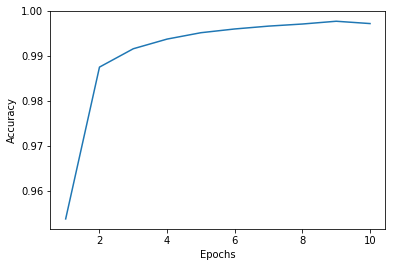

In [4]:
#  convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

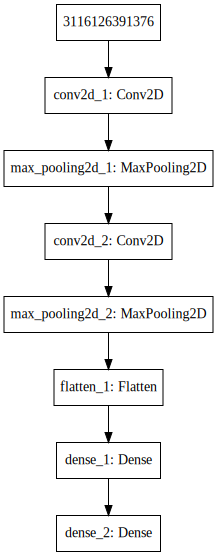

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))